<a name='TableOfContents'></a>

# Notes:
1. Please run the first two cells as is to load libraries
2. The code guides and output will help you develop your code
3. in case your results are not matching the previous output (left for you) this could be due to randomization and you should not worry about them
4. Most of the code is ready,  all you need to do in fill in some parts of the codes to complete

# Load Libraries

In [3]:
from sklearn.datasets import  make_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer # incase of error update sklearn to v1.0
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


import pandas as pd
import numpy as np

import pickle
import random

import matplotlib.pyplot as plt
import seaborn as sns

<a id='Question1'></a>

# Exercise 1 (Build simple regression using manual data)

1. Generate dataset (manually)
    - Generate random data, one independent variable, 20 samples (X)
    - Then, randomly choose c and m, where C is the intercept and m is the Coefficient(slope).
    - Generate the dependent variable (**y**) applying the  equation 

        $y = C + m. x + \epsilon$, where $\epsilon$ is some random error
        

2. Develop a Python function (**estimate_Coef(x, y)** ) that estimates \beta_0 , \beta_1 using the slide equations:

 $\beta_1 = \frac{(n \sum_i{x_iy_i} - \sum_i{x_i} \sum_i{y_i})}{(n \sum_i{x_i^2} - (\sum_i{x_i})^2 )}$

 $\beta_0 = \frac{1}{n} \sum_i{y_i} - \frac{\beta_1}{n} \sum_i{x_i} $


where \beta_0 is an estimate for the intercept, and \beta_1 is an estimate to the slope. x and y are the
independent and dependent variables respectively


3. We want to use our developed function to estimate the C and m from the data compared to the original C and m
5. To draw the regression line:
    - Compute the predictions for each data point. This must be a regression line that represents the mean of the data
    - Scatter plot the original data (X, y), then plot a line using (X, y_predicted) 

[Return to Table of Contents](#TableOfContents)





In [3]:
# Task 1 : Generate some data
# any random seed let us pick 
np.random.seed(40)

# use randn from np.random to pick 20 error values
# phonminana error
err = np.random.randn(20)

# Also, pick 20 random value for X (indpendent variable)
X = np.random.randn(20) # std = 1


print('data std:', np.std(X) )

data std: 0.8583646709223433


In [4]:
## Task 2: Randomly choose  intercept and Slope 
# it has to be real value greater than 1
# format:  np has rand and randint 
# the rand function will draw a value from 0 to 1 
# the ranint will draw an integer value

# let use randomly choose intercept c or b0 using choice from np.random
c   = np.random.choice(np.random.rand(20)+ np.random.randint(20)) 

# let use randomly choose intercept m or b1 using choice from np.random
m  = np.random.choice(np.random.random(20) + np.random.randint(20))

print('c=', c, 'and m =', m)

c= 0.5099805820814677 and m = 7.879856856532821


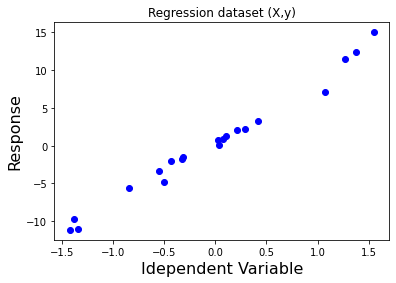

In [5]:
# let us compute the response y
y = c +  m *  X   + err

# plot the generated data
plt.scatter(X,y, c='b')
plt.xlabel('Idependent Variable', fontsize=16)
plt.ylabel('Response', fontsize=16)
plt.title('Regression dataset (X,y)')
plt.show()

In [6]:
# Task 3: Define a Python function (estimate_Coef(x, y) )that estimates the coffecients
# define or build a function
def estimate_coef(X,y): # fun header
   #get size of samples in X
    n = np.size(X)
  #Convert the slide questions to python for b1 and b0 
    b1 = (n * np.sum(X*y) - (np.sum(X) * np.sum(y)) ) / ( n* (np.sum(X**2)) - (np.sum(X)**2)   )
    b0 = np.mean(y) - b1 * (np.mean(X))
    
    # return coeficients b0 and b1
    return (b0, b1)

*************

In [7]:
# Task 4: Pass the generated data in steps 1 and 2 to the estimate_Coef()
# Estimate the papmetres 
b0, b1 = estimate_coef(X,y)
print('Estimated Coefients: b0=%0.2f, b1=%0.2f'% (b0, b1))

Estimated Coefients: b0=0.57, b1=8.15


***********


In [8]:
# Task 5: Use these coefficients to compute y_pred using the data in X only
# Compute the the response using learned coeficients
y_pred = b0 + X *b1

**********

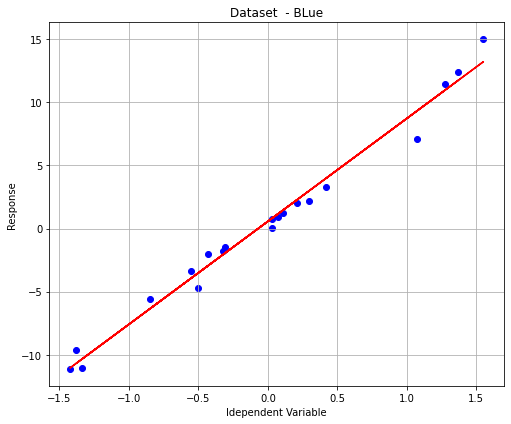

In [9]:
# Task 6: Draw the regression line over scattered data plot.
# figure size
plt.Figure(figsize=(10,8))

# scater plot the data X and y
plt.scatter(X,y, c='b')

# plot a model line over the scattered data 
plt.plot(X, y_pred, c='r')

plt.xlabel('Idependent Variable')
plt.ylabel('Response')
plt.grid()
plt.title('Dataset  - BLue')

plt.tight_layout(rect=(0,0,1.2,1.5))

plt.show()

**Observation**

The model line is perfectly passes through the avg of the data. Hopefully new datapoints will follow this trend in future

<a name='Question2'></a>

# Exercise 2 (Explore and practice Sklearn Regression modules)

Import the linear regression package from Scikit learn library. Then, for each dataset from the previous question fit a linear regression. Get both the intercept and coefficient values from the trained models and compare it with your results in the previous question.



[Return to Table of Contents](#TableOfContents)

In [10]:
# load the LinearRegression model from linear_model module
from sklearn.linear_model import LinearRegression

In [11]:
# generate the model and training it
Lr = LinearRegression()

# As the data is 1D, sklearn will complain to have 2D data
# you need to reshape your data using .reshape(-1, 1)
# this means arrange my data with any number of rows but add another dimension to it
# another method is [:, None]

# Train the model
Lr.fit(X[:,None], y)  # complete code here 

print('A model is created and trained successfully ..')

A model is created and trained successfully ..


In [12]:
# Find out the coeficients
model_b0 = Lr.intercept_
model_b1 = Lr.coef_
print('dataset1:\nSklearn:b0=%0.2f wraper:b0=%0.2f\nSklearn:b1=%0.2f wraper:b1=%0.2f'%(model_b0, b0, model_b1, b1 ))


dataset1:
Sklearn:b0=0.57 wraper:b0=0.57
Sklearn:b1=8.15 wraper:b1=8.15


**Observation**

The coefficients are exactly the same. Linear Regression model in sklearn uses the closed form solution. There is another version with estimates the coefficients using gradient descent algorithm

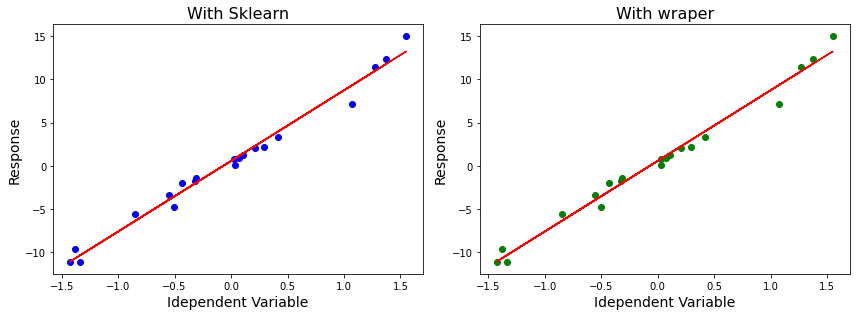

In [13]:
# show the results, the prediction will be used directly
plt.figure(figsize=(10,3) )
plt.subplot(1,2,1)
plt.scatter(X,y, c='b')
plt.title('With Sklearn', fontsize=16)
plt.plot(X, Lr.predict(X[:,None]), c='r')
plt.xlabel('Idependent Variable', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.subplot(1,2,2)
plt.scatter(X,y, c='g')
plt.title('With wraper', fontsize=16)
plt.xlabel('Idependent Variable', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.plot(X, y_pred, c='r')
plt.tight_layout(rect=(0,0,1.2,1.5))
plt.show()

*****

# Exercise 3 ( Load Boston dataset )

We want to answer the question raised in the slides and estimate the house price for house with 6-bedroom size. We need to build a regression model using the Boston house dataset and consider only RM as the independent variable, while price (target) is the response from this model. 

**Note:** The Boston dataset will be deprecated in future, so you can load the dataset from a course file. 


[Return to Table of Contents](#TableOfContents)

In [14]:
# load the Boston housing dataset
boston = load_boston()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [15]:
# the dataset has a dictionary structure
# so let us check the keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

From the above keys, 
1. we can access the data (matrix form), 
1. a target (1xn size) for each record in the data
1. feature_names can be listed 
1. detailed description can be accessed using DESCR
1. filename a local path to the csv file

In [16]:
# let us check all  features
print('Features:\n', boston.feature_names.reshape(-1,1))
print('\n\nWe need only RM feature to build our model in this exercise!')

Features:
 [['CRIM']
 ['ZN']
 ['INDUS']
 ['CHAS']
 ['NOX']
 ['RM']
 ['AGE']
 ['DIS']
 ['RAD']
 ['TAX']
 ['PTRATIO']
 ['B']
 ['LSTAT']]


We need only RM feature to build our model in this exercise!


In [17]:
# import pickle
# a_file = open("boston_house_data.pkl", "wb")
# pickle.dump(boston, a_file)
# a_file.close()

In [18]:
# # how to load it using pickle
# a_file = open("boston_house_data.pkl", "rb")
# boston = pickle.load(a_file)

### Build a Linear Regression model using RM feature

In [19]:
# Build an LR model
Lr1 = LinearRegression()

# train it with RM data (index 5) - [:,None] we can use reshape(-1,1)
Lr1.fit(boston.data[:,5][:,None], boston.target)

print('training finished, and a LR model is created with RM as input ..')

training finished, and a LR model is created with RM as input ..


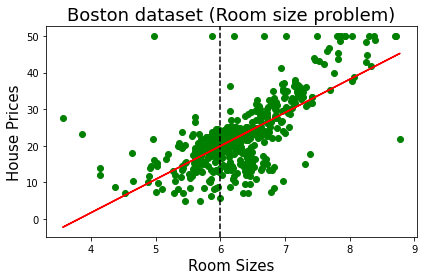

In [20]:
# let us plot the data and the model
plt.scatter(boston.data[:,5], boston.target, c='g')
plt.axvline(x = 6.0, color='k', linestyle='--')
plt.plot(boston.data[:,5], Lr1.predict(boston.data[:,5].reshape(-1,1)), c='r' )
plt.xlabel('Room Sizes', fontsize=15)
plt.ylabel('House Prices', fontsize=15)
plt.title('Boston dataset (Room size problem)', fontsize=18)
plt.tight_layout()
plt.show()

### Estimate the 6-bedroom house price

In [21]:
# To estimate a new house, we need to input the value between two brackets [[value ]]
EstPrice = Lr1.predict([[6]])
print("My program estimates your house's price as:{0:0.2f}K$".format(EstPrice[0]))

My program estimates your house's price as:19.94K$


**This way, we can estimate any house price based on its size** 

we can estimate a batch of houses at once by passing the RM sizes as a list

In [22]:
# batch houses predictions
EstPrice = Lr1.predict(np.array([5, 6, 7, 9]).reshape(-1,1))
print('houses sizes:',[5, 6, 7, 9])
print("Prices", EstPrice)

houses sizes: [5, 6, 7, 9]
Prices [10.83992413 19.94203311 29.04414209 47.24836005]


<a name='Question3'></a>


# Exercise 4 ( Identify which features less not important)


Scikit learn allow us to generate multi-feature regression data using **make_regression** method. The make_regression has several parameters to configure to satisfy your needs and study the regression models. In this exercise, we want to generate some regression data with 10 features. Some of these feature should be not related (non informative).  Then, we want to build a regression model and study the regression coefficients to identify which features are not informative?

1. Configure the **n_informative** parameter with the following equation 

                n\_informative = np.random.randint(9) + 1 

, so we don't know how many of the features are not informative!

2. Then, build a regression model as we did in the previous exercises, and find out the regression coefficients, and 
5. Determine which features can be neglected!! 


[Return to Table of Contents](#TableOfContents)

In [4]:
from sklearn.datasets import make_regression

Xr, yr = make_regression(n_features = 10, n_informative = np.random.randint(9)+1)

# instantiated previously
Lr = LinearRegression()

# fit (train)
Lr.fit(Xr, yr)

# Predict (test)
y_pred = Lr.predict(Xr)

# loop over these coeffcients and study them
i = 1
for cof in Lr.coef_:
    print('b%d=%0.2e'%(i,cof))
    i+=1



b1=1.52e+01
b2=6.78e+01
b3=9.56e+00
b4=-7.50e-15
b5=-2.60e-14
b6=1.08e+01
b7=9.38e+01
b8=1.44e-14
b9=-4.37e-14
b10=-2.51e-15


**Observations:**
1. Any feature with a tiny coef. approaches zero can be neglected!

**********

# Exercise 5 ( Boston dataset - Multiple regression)

In this exercise, we want to build a better regression model using all features provided in Boston dataset. In total, the dataset has 13 features and then we may check out our estimate for 6-bedroom house while neglecting all other features. You may plot the relationship of each features against price

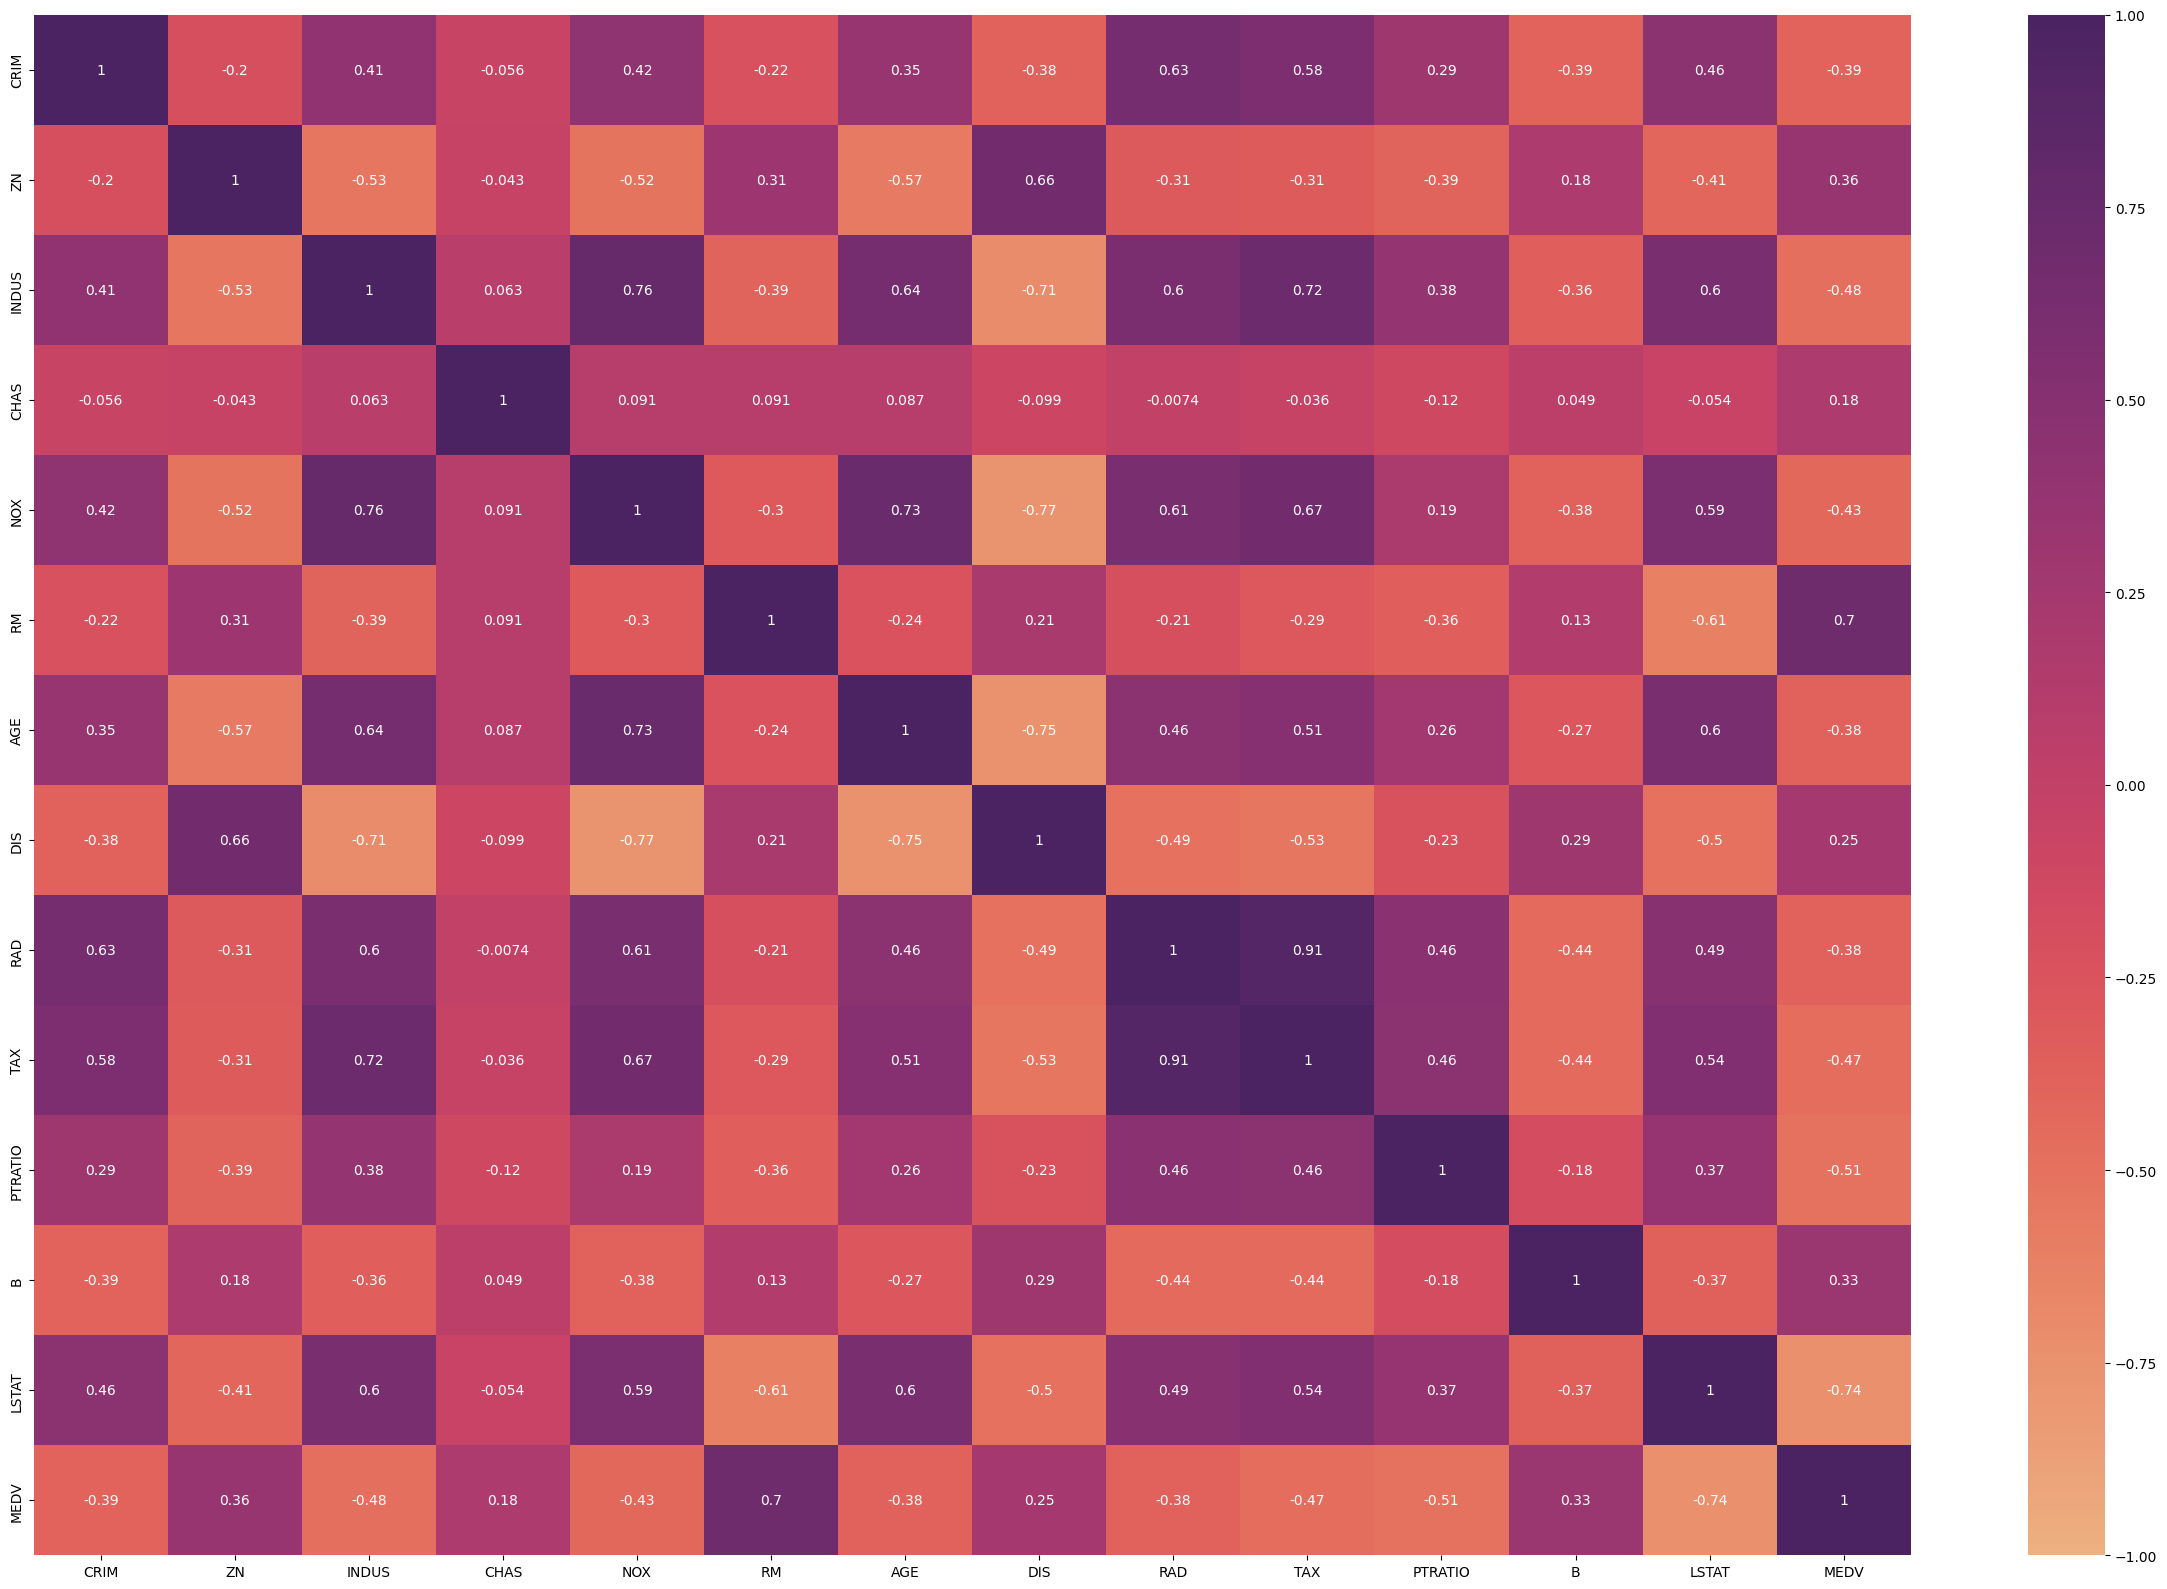

In [18]:
# let us check the data correlations
boston = pd.read_csv('boston_house_prices.csv')
numerical_data = boston.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(boston.corr(),vmin=-1, vmax=1, annot=True,  cmap='flare')

plt.tight_layout(rect=(0,0,2,2))
plt.show()

**Note:** High multicollinear among a number of features such as DIS with  NOX, INDUS,  and AGE above -0.7

In [22]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

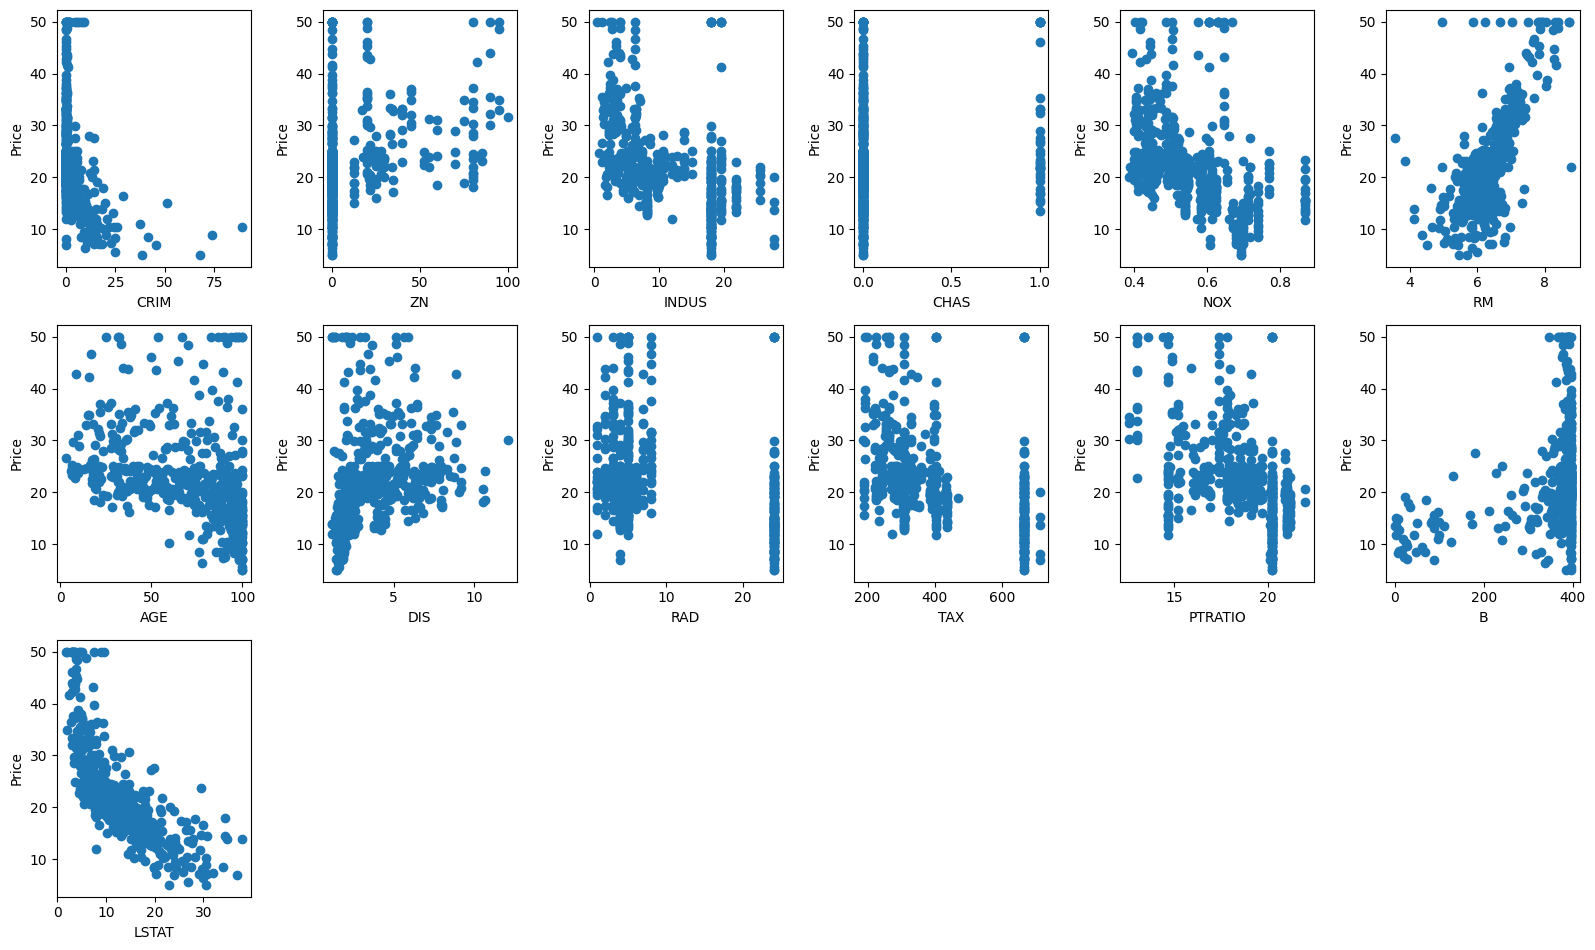

In [28]:
# let us check each feature corrlation with prices
# Iterate over each feature to create scatter plots
for i in range(13):  # Assuming there are 13 features
    plt.subplot(3, 6, i+1)  # Adjust subplot arrangement if needed
    plt.scatter(boston.iloc[:, i], boston['MEDV'])
    plt.xlabel(boston.columns[i])
    plt.ylabel('Price')
    
plt.tight_layout(rect=(0,0,2.5,2))
plt.show()

**Notes:** not all features are effective and has linear relationship with price. We can work on them a little to fix those that has high skewed relationship using some transformation such as log. (left for your to explore that)

In [30]:
# let us assume, you work a little more on the data and now you're ready to work on and build the regression model
# Build an LR model
Lr2 = LinearRegression()
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']
# train it with RM data (index 5) - [:,None] we can use reshape(-1,1)
Lr2.fit(X, y)

print('training finished, and a LR model is created with all features as input ..')

training finished, and a LR model is created with all features as input ..


In [31]:
# loop over these coeffcients and study them
i = 1
for cof in Lr2.coef_:
    print('b%d=%0.2e'%(i,cof))
    i+=1

b1=-1.08e-01
b2=4.64e-02
b3=2.06e-02
b4=2.69e+00
b5=-1.78e+01
b6=3.81e+00
b7=6.92e-04
b8=-1.48e+00
b9=3.06e-01
b10=-1.23e-02
b11=-9.53e-01
b12=9.31e-03
b13=-5.25e-01


So what is the price of a house with 6-bedroom, assuming we know nothing about the other features

In [32]:
# To estimate a new house, we need to input the value between two brackets [[value ]]
EstPrice = Lr2.predict([[0,0,0,0,0,6,0,0,0,0,0,0,0]])
print("My program estimates 6-bedroom house's price as:{0:0.2f}K$".format(EstPrice[0]))

My program estimates 6-bedroom house's price as:59.32K$


/Users/omaralolayan/Desktop/kfupmCourse/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Observation**

That is better price given 6-bedroom in boston and using a model that consider other 12 features will estimate the house price more than double the previous model

In [35]:
# how about get the minimum value per feature and check out what price will have
EstPrice = np.min(X , axis=0)
print("My program estimates the modest house's price as:{0:0.2f}K$".format(EstPrice[0]))
print('\nFeatures are as follow:')
i=0
for ft in X.columns:
    print(ft, '%0.2e'%EstPrice[i])
    i +=1

My program estimates the modest house's price as:0.01K$

Features are as follow:
CRIM 6.32e-03
ZN 0.00e+00
INDUS 4.60e-01
CHAS 0.00e+00
NOX 3.85e-01
RM 3.56e+00
AGE 2.90e+00
DIS 1.13e+00
RAD 1.00e+00
TAX 1.87e+02
PTRATIO 1.26e+01
B 3.20e-01
LSTAT 1.73e+00


/var/folders/t4/n7hmgl3x4t37tfbxfbczj19m0000gn/T/ipykernel_67856/868909688.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("My program estimates the modest house's price as:{0:0.2f}K$".format(EstPrice[0]))
/var/folders/t4/n7hmgl3x4t37tfbxfbczj19m0000gn/T/ipykernel_67856/868909688.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(ft, '%0.2e'%EstPrice[i])


*****

<a name='Question4'></a>

# Exercise 6 ( How good our regression model is? )

In machine learning, we need to have a measure that is indicating a level of model goodness. Now, we want to evaluate the previous models and use 80% of data to rebuild them. The 20% of the data should be used for testing (to report performance). 

In this exercise, we are going to compute the $R^2$ for each model we build to pick the best one. 



[Return to Table of Contents](#TableOfContents)

In [30]:
# let us generate random mask to pick some samples for training and other for testing
import random

# Generate indecies 
indecies = np.arange(len(X))

# sampling using random package to sample traing samples and rest for testing (unique indecies)
tr_ind = random.sample(list(indecies), int (np.round((len(X))* 0.8) ))
ts_ind = np.delete(indecies, tr_ind).astype(int)

# Divide the data
X_train = X[tr_ind]; X_test  = X[ts_ind]
y_train = y[tr_ind]; y_test  = y[ts_ind]


**Note** Since the data has no timestamps among its samples, we can pick randomly samples to for training and testing. This is not the case if we have timestamped data such as stock market. In the later case, we need to keep track on order! 

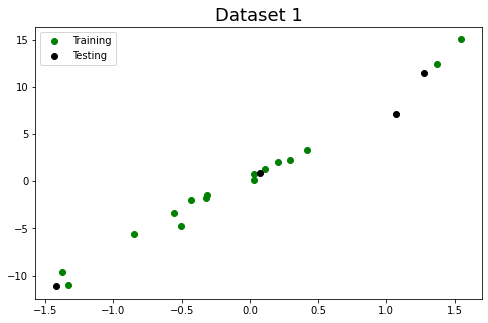

In [31]:
# plot the training and testing data
plt.figure(figsize=[8,5])
plt.scatter(X_train,y_train, c='g', label='Training')
plt.scatter(X_test,y_test,  c='k', label='Testing')
plt.title('Dataset 1', fontsize=18)
plt.legend()
plt.show()

In [32]:
##Task3: Perform leanring on the training dataset
# This means estimating the coeficients of the linear regression
# Make a new model
Lr =  LinearRegression()
Lr.fit(X_train[:, None], y_train)
print('b0={0:0.2f},  b1={1:0.2f}'.format(Lr.intercept_, Lr.coef_[0]))

b0=0.72,  b1=8.34


In [33]:
# Find responses of the testing dataset
y_pred= Lr.predict(X_test.reshape(-1,1))

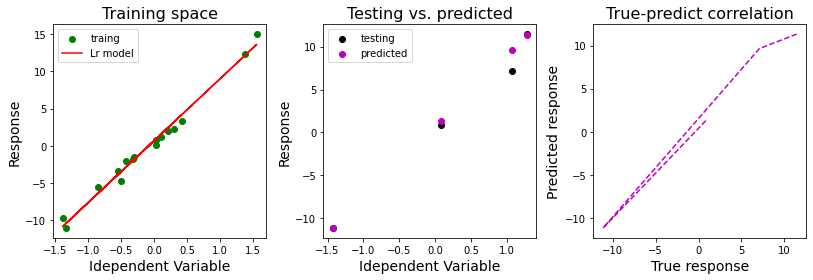

In [34]:
# visualize the results 

plt.subplot(1,3,1)
# scatter plot the training data
plt.scatter(X_train,y_train, c='g', label='traing')

# plot the lr model
plt.plot(X_train,Lr.predict(X_train[:, None]), c='r', label='Lr model' )
plt.title('Training space', fontsize=16)
plt.xlabel('Idependent Variable', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend()

plt.subplot(1,3,2)
# scatter plot the training data
plt.scatter(X_test,y_test, c='k', label='testing')
plt.scatter(X_test,Lr.predict(X_test[:, None]), c='m', label='predicted' )
plt.title('Testing vs. predicted', fontsize=16)
plt.xlabel('Idependent Variable', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend()

plt.subplot(1,3,3)
# scatter plot the training data
plt.plot(y_test,Lr.predict(X_test[:, None]), c='m',linestyle='--'  )
plt.title('True-predict correlation', fontsize=16)
plt.xlabel('True response', fontsize=14)
plt.ylabel('Predicted response', fontsize=14)

plt.tight_layout(rect=(0,0,1.9,1))
plt.show()

from the results above it seem good model, but we can compute the R-squared to have some value 

In [35]:
## Compute the $R^2$

# we can compute the r-squared for the training set to let us 
# how good or bad the model expalined the training sample variance 
print('Coefficient of determination:{0:0.2f}'.format(r2_score( y_train, Lr.predict(X_train.reshape(-1,1)))) )


Coefficient of determination:0.99


In [36]:
# we can compute the r-squared for the testing set to tell us 
# something about the predictive quality of your model
print('Coefficient of determination:{0:0.2f}'.format(r2_score( y_test, Lr.predict(X_test.reshape(-1,1)))) )


Coefficient of determination:0.98


R-squared = 0.93 is so good as a result

**Note:** Please note the results that you will compute depends on the samples that you pick randomly. In some cases it won't be good!!

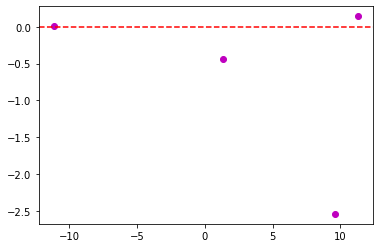

In [37]:
# Residual plot : as this dataset is small and we know it doesn't have Heteroscedastic data
plt.axhline(y=0,c='r', linestyle='--')
plt.scatter(y_pred, y_test - y_pred , c='m')
plt.show()

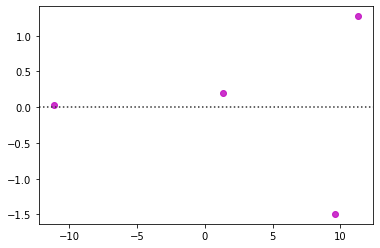

In [38]:
# Seabron has a function residplot
sns.residplot(x=y_pred, y= y_test - y_pred, color = 'm')
plt.show()

 Due to limited data, we cannot say that the point (7.8, 2.4) is outlier. In the case above, we are zoomed in the results, we need larger test sample. 

**Note:**
However, in such a scenario, we may infer that there is heteroscedasticity in the dataset and could not be appropriate for regression!

*************

# Exercise 7 ( Build and evaluate regression model using boston dataset)

Repeat the above analysis, and study the results for boston dataset

In [39]:
# let us generate random mask to pick some samples for training and other for testing
import random

# Generate indecies 
indecies = np.arange(len(boston.target))

# sampling using random package to sample traing samples and rest for testing (unique indecies)
tr_ind = random.sample(list(indecies), int (np.round((len(boston.target))* 0.8) ))
ts_ind = np.delete(indecies, tr_ind).astype(int)

# Divide the boston dataset into training and testing
boston_X_train = boston.data[tr_ind, :]; boston_X_test  = boston.data[ts_ind, :]
boston_y_train = boston.target[tr_ind];  boston_y_test  = boston.target[ts_ind]


In [40]:
# This means estimating the coeficients of the linear regression
# Make a new model
Lr =  LinearRegression()
# train the model
Lr.fit(boston_X_train, boston_y_train)
print('b0={0:0.2f}'.format(Lr.intercept_))
i = 1
for cof in Lr.coef_:
    print('b%d=%0.2f'%(i, cof))
    i+=1


b0=35.53
b1=-0.08
b2=0.04
b3=0.02
b4=2.51
b5=-17.55
b6=3.99
b7=-0.01
b8=-1.51
b9=0.26
b10=-0.01
b11=-0.97
b12=0.01
b13=-0.49


In [41]:
# Find responses of the testing dataset
y_pred= Lr.predict(boston_X_test)

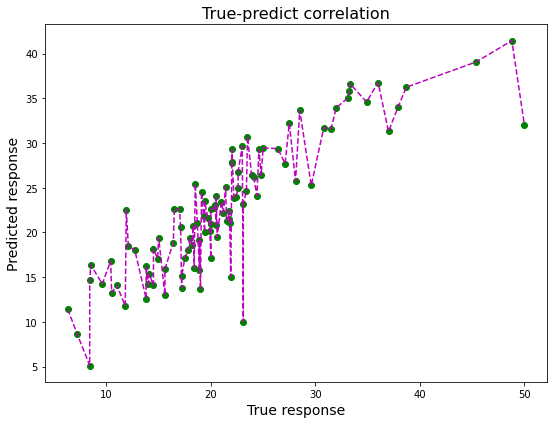

In [42]:
# visualize the results 

# scatter plot the training data
plt.scatter(boston_y_test,Lr.predict(boston_X_test), c='g'  )

# avoid chaos in plotting the predictive line
list1, list2 = zip(*sorted(zip(boston_y_test, y_pred)))
plt.plot(list1,list2, c='m',linestyle='--'  )
plt.title('True-predict correlation', fontsize=16)
plt.xlabel('True response', fontsize=14)
plt.ylabel('Predicted response', fontsize=14)

plt.tight_layout(rect=(0,0,1.3,1.5))
plt.show()

to be perfect it should be so linear!

In [43]:
## Compute the $R^2$

# we can compute the r-squared for the training set to let us 
# how good or bad the model expalined the training sample variance 
print('Coefficient of determination:{0:0.2f}'.format(r2_score( boston_y_train, Lr.predict(boston_X_train))) )


Coefficient of determination:0.74


In [44]:
# we can compute the r-squared for the testing set to tell us 
# something about the predictive quality of your model
print('Coefficient of determination:{0:0.2f}'.format(r2_score( boston_y_test, Lr.predict(boston_X_test))) )


Coefficient of determination:0.73


R-squared = 0.75 is a good as a result

**Note:** Please note the results that you will compute depends on the samples that you pick randomly. In some cases it won't be good!!

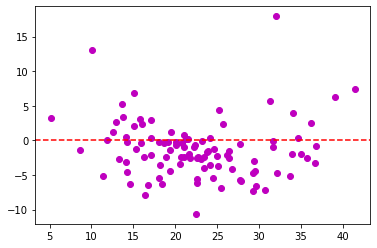

In [45]:
# Residual plot : as this dataset is small and we know it doesn't have Heteroscedastic data
plt.axhline(y=0, c='r', linestyle='--')
plt.scatter(y_pred, boston_y_test - y_pred, c='m')
plt.show()

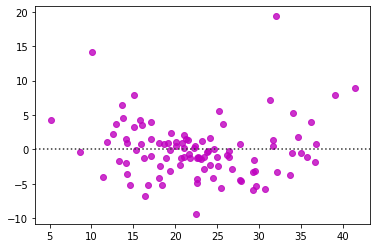

In [46]:
# Seabron has a function residplot
sns.residplot(x=y_pred, y= boston_y_test - y_pred, color = 'm')
plt.show()

residuals are scattered around the ‘0’ line, there is no pattern, and points are not based on one side so there’s no problem of heteroscedasticity.

We may study further the samples that produced residuals less than -15 and above 10 in the above figure 

In [47]:
# compute the predictive error rate
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MAE: Error rate = %0.2f'% mean_absolute_error(boston_y_test, y_pred))
print('MSE: Error rate = %0.2f'% mean_squared_error(boston_y_test, y_pred))
print('RMSE: Error rate = %0.2f'% np.sqrt(mean_squared_error(boston_y_test, y_pred)))

MAE: Error rate = 3.25
MSE: Error rate = 18.71
RMSE: Error rate = 4.33


<a name='Question6'></a>

# Exercise 8 : ( Nonlinear Regression )

Suppose you have a new dataset and asked to build the regression model. First, thing you might perform is to visualize the data. The figure showed a nonlinear relationship between the independent variable and the response. Therefore, you decided that a simple linear regression will not work well in this domain. 

1. Develop the code below to perform polynomial regression on the data. Let say, you decided to build quadratic and polynomial (degree 4) models
2. Which model you will choose to keep for future use? Why?

[Return to Table of Contents](#TableOfContents)

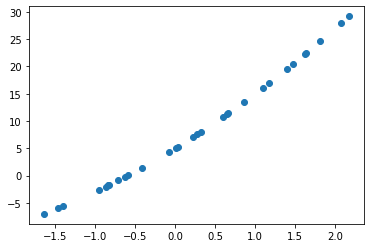

In [48]:
# To expand our dependent variable
from sklearn.preprocessing import PolynomialFeatures 

# let us generate another dataset
Xp = np.random.randn(30)
Xp = np.sort(Xp)

# each time your run this we have different response!
ym = np.random.randint(10) + np.random.randint(10) * Xp +  Xp ** np.random.randint(10)
plt.scatter(Xp, ym)
plt.show()

You may need to run the cell above few times to get nonlinear data

In [49]:
# Here is how we can use pipelines. 
# since we have a transformation followed by modeling, we can stack them together 
# Then, the same behavior is maintained, we need to call fit and then predict the new data
# It is much more organized as we don't need to double-check our transformation parameters again

from sklearn.pipeline import make_pipeline
mdls = []
for dg in range(1,5, 1):
    Lr = make_pipeline(PolynomialFeatures(degree = dg), LinearRegression())
    Lr.fit(Xp.reshape(-1,1), ym)
    mdls.append(Lr)

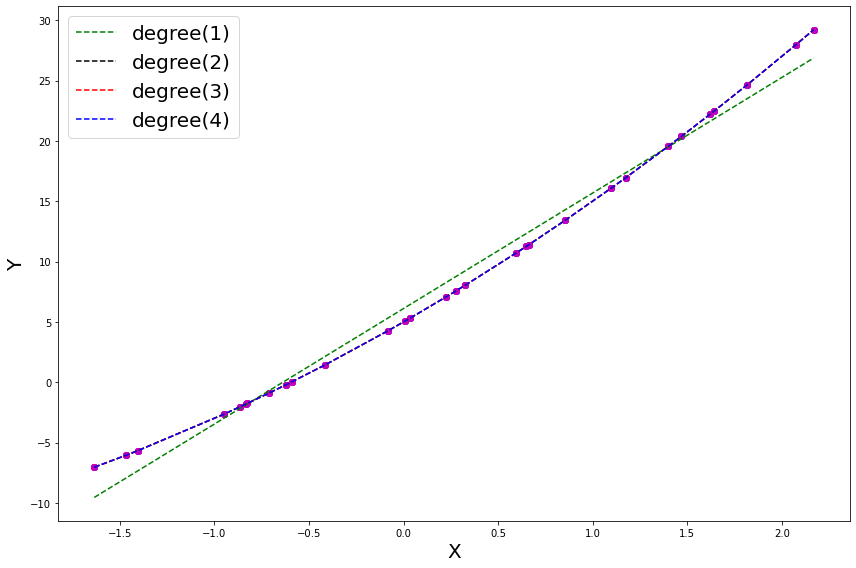

In [50]:
# Visualising the Polynomial Regression results
c = ['g', 'k', 'r','b']
i = 0
for Lr in mdls:
    plt.scatter(Xp, ym, color = 'm')
    plt.plot(Xp, Lr.predict(Xp.reshape(-1,1)), c = c[i], label='degree('+ str(i+1) + ')', linestyle='--' )
    i +=1
plt.legend( fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.tight_layout(rect=(0,0,2,2))
plt.show()

**Question 6. part2:** In the above case, we may select the quadratic model.
Why: the polynomial model with that high degree is overfitting the data. This is not really learning but it is kind of memorizing the training. The learning should have some kind of flexibility that is not too much overfitting with the training data and leave some room for minor errors. Therefore, in future we hope our learned model will still be able to produce acceptable performance. 

<a name='Question7'></a>

# Exercise 9: Piecewise Regression

Let us reuse the data generated in the previous exercise (8) and use splinetransformation instead of polynomial regression to build a regression model


[Return to Table of Contents](#TableOfContents)

In [51]:
# To expand our dependent variable
from sklearn.preprocessing import SplineTransformer 

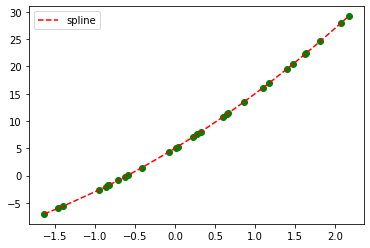

In [52]:
# 2. Initiate the transformation model and transform
splines = SplineTransformer(degree=2, n_knots=3)
Xs = splines.fit_transform(Xp.reshape(-1,1))

# 3. build the a regression model 
lrs = LinearRegression().fit(Xs, ym)

# 4. predict y
y_pred = lrs.predict(Xs)

# plot the results
plt.scatter(Xp, ym, color = 'g')
plt.plot(Xp, y_pred, c = 'r', label='spline', linestyle='--' )
plt.legend()
plt.show()

In [53]:
def Concave(x):
    return 1/(1+25*x**4)

# make example data
Xc = np.linspace(-1,1,50)
yc = Concave(Xc) + np.random.normal(0, 0.2, len(Xc))

m1 = np.ones(30)
m1 = np.append(m1, np.zeros(20) )
np.random.shuffle(m1)
msk = np.array(m1, dtype= bool)

X_tr = Xc[msk].flatten()
y_tr = yc[msk].flatten()
X_ts = Xc[np.logical_not(msk)].flatten() 
y_ts = yc[np.logical_not(msk)].flatten() 

In [54]:
Qaud_reg = PolynomialFeatures(degree =3)
X_Qaud    =Qaud_reg.fit_transform(X_tr[:,None])
lrQ = LinearRegression()
lrQ.fit(X_Qaud,y_tr)
print(lrQ.coef_)

[ 0.          0.12421025 -1.50249253 -0.15776872]


In [55]:
# to to predict
#1- you need to transform the new raw data using our transformation model
#2- use the transformed data to get the new reponss

# new_point = Qaud_reg.fit_transform(np.array([-0.5]).reshape(-1,1))
new_points = Qaud_reg.fit_transform(X_ts[:, None])
print('Error:',mean_absolute_error(y_ts, lrQ.predict(new_points) ) )

Error: 0.3015389198770778


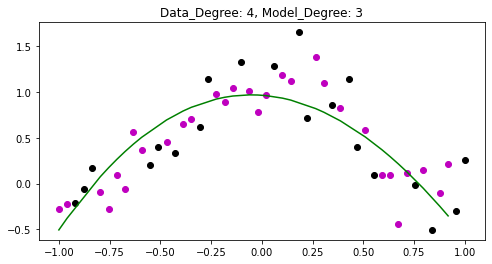

In [56]:
lrQCoef = np.append(lrQ.coef_, lrQ.intercept_)
plt.figure(figsize = (8,4))
plt.scatter(X_tr, y_tr, c='m')
plt.scatter(X_ts, y_ts, c='k')
plt.plot(X_tr, np.polyval(lrQCoef, X_tr), c='g')
plt.title('Data_Degree: 4, Model_Degree: 3')
plt.show()

### spline regression 

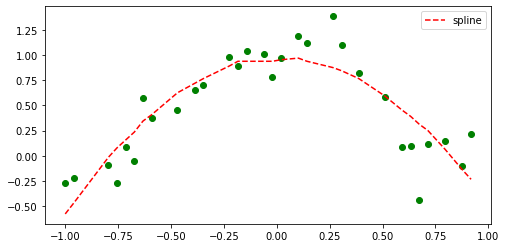

In [57]:
splines = SplineTransformer(degree=2, n_knots=2)
Xstr = splines.fit_transform(X_tr.reshape(-1,1))

# 3. build the a regression model 
lrs = LinearRegression().fit(Xstr, y_tr)

# 4. predict y
Xsts = splines.fit_transform(X_ts.reshape(-1,1))
y_pred = lrs.predict(Xsts)

# plot the results
plt.figure(figsize = (8,4))
plt.scatter(X_tr, y_tr, color = 'g')
plt.plot(X_tr, lrs.predict(Xstr), c = 'r', label='spline', linestyle='--' )
plt.legend()
plt.show()

In [58]:
print('Error:',mean_absolute_error(y_ts, y_pred ) )

Error: 0.3308891899960211


**Better error results with less complex model only 2 degree model**

************

************

<a name='Question8'></a>

# Exercise 10  (Regularization)

Model generalization is our ultimate goal when building a machine learning model. The model that we are happy of its performance during validation, should also makes happy during testing. However, due to a problem called overfitting, the trained model is so perfect during training, but not at the time of testing. This is could be due to training the model so much to the point that the model remembered the exact training samples(aka. learned the data noise). On the other hand, having limited training data make cause an issue of overfitting! 

In any case, a remedy to overfitting is to regularize the model during training stage. What happens in regularization is that the algorithm penalize the less influential model's parameters (i.e., feature) by reducing its value to zero in some cases. Therefore, if the model's parameter is zeroed that means the feature associated with that parameter is completed ignored by the model!

In this exercise, we want to build a regularized regression models. As presented in the slides, we will study both Ridge and LASSO regression or L2 and L1 regularization respectively.  





[Return to Table of Contents](#TableOfContents)

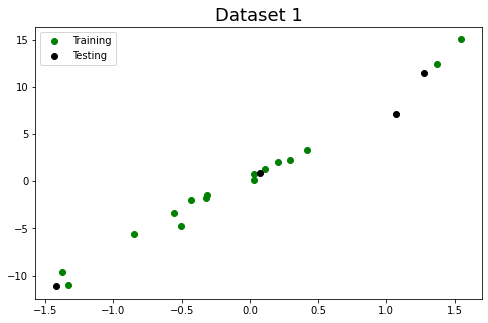

In [59]:
# let us borrow the dataset generated in Exercise 1 (X, and y)

# visualize the data
plt.figure(figsize=[8,5])
plt.scatter(X_train,y_train, c='g', label='Training')
plt.scatter(X_test,y_test,  c='k', label='Testing')
plt.title('Dataset 1', fontsize=18)
plt.legend()
plt.show()

In [60]:
X_train_sorted, y_train_sorted = zip(*sorted(zip(X, y)))
X_train_sorted = np.array(X_train_sorted)
y_train_sorted = np.array(y_train_sorted)

In [61]:
# let us pick the first two samples to build the regression model
X_train2 = X_train_sorted[:2]
y_train2 = y_train_sorted[:2]

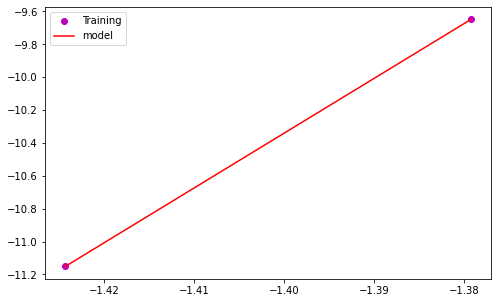

In [62]:
# let us build a regression model on this data study behavior
Lr = LinearRegression().fit(X_train2.reshape(-1,1), y_train2)

# let us check the model
# visualize the data
plt.figure(figsize=[8,5])

#plt.scatter(X_train_sorted,y_train_sorted, c='g', label='Training')
plt.scatter(X_train2,y_train2, c='m', label='Training')
plt.plot(X_train2,Lr.predict(X_train2.reshape(-1,1)),  c='r', label='model')
plt.legend()
plt.show()

In [63]:
# Now, if we compute the training score using this model, it must be perfect
print ('R-sqaured: %0.2f'% Lr.score(X_train2.reshape(-1,1), y_train2) )
print ('RMSE: %0.2f'% np.sqrt (mean_squared_error(y_train2, Lr.predict(X_train2.reshape(-1,1)) ) ) )

R-sqaured: 1.00
RMSE: 0.00


**That is just perfect**

In [64]:
# know let us check the performance on the testing dataset (we omitting the validation stage here)
print ('RMSE: %0.2f'% np.sqrt (mean_squared_error(y_test, Lr.predict(X_test.reshape(-1,1)) ) ) )

RMSE: 50.49


The error is no where near zero as the training, let us visualize

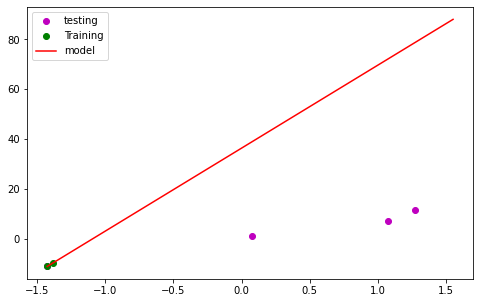

In [65]:
# visualize the data
plt.figure(figsize=[8,5])
plt.scatter(X_test,y_test, c='m', label='testing')
plt.scatter(X_train2,y_train2, c='g', label='Training')

# extended the model 
plt.plot(X_train_sorted,Lr.predict(X_train_sorted.reshape(-1,1)),  c='r', label='model')
plt.legend()
plt.show()

The regression line is way far from the right position!

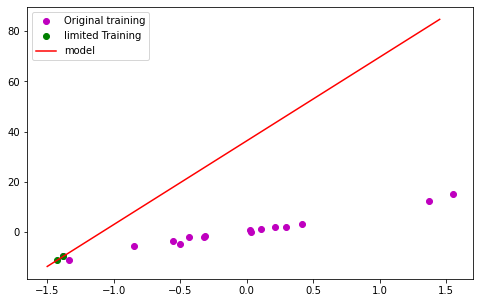

In [66]:
# visualize the data
plt.figure(figsize=[8,5])
plt.scatter(X_train,y_train, c='m', label='Original training')
plt.scatter(X_train2,y_train2, c='g', label='limited Training')

# extended the model 
XX = np.arange(-1.5, 1.5, 0.05 )
plt.plot(XX,Lr.predict(XX.reshape(-1,1)),  c='r', label='model')
plt.legend()
plt.show()

As we can see from this figure, the magenta data points are not considered in the training, so the model have a wrong direction. We can reduce the effect or fix this by penalizing the slope of this regression line. To do that, we need to regularize.  let us know check the Ridge and then Lasso

In [67]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

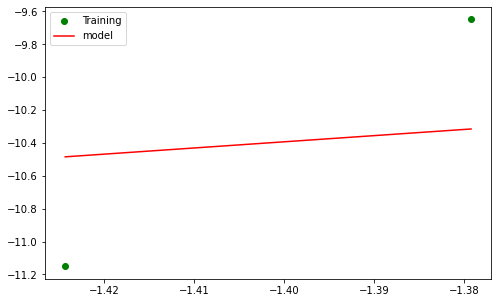

In [68]:
# let us build a regression model on this data study behavior
Lridge = Ridge(alpha=0.008).fit(X_train2.reshape(-1,1), y_train2)

# let us check the model
# visualize the data
plt.figure(figsize=[8,5])
plt.scatter(X_train2,y_train2, c='g', label='Training')
plt.plot(X_train2,Lridge.predict(X_train2.reshape(-1,1)),  c='r', label='model')
plt.legend()
plt.show()

It is clear that the regression line know isn't perfect on the data, we hope our regression line will follow the future trend. Let us check the performance 

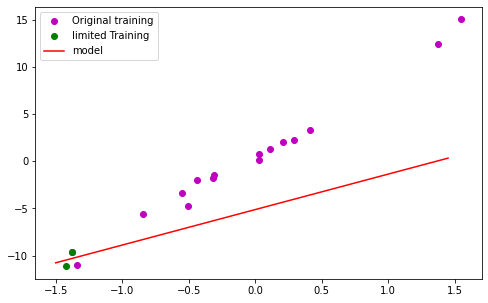

In [69]:
# visualize the data
plt.figure(figsize=[8,5])
plt.scatter(X_train,y_train, c='m', label='Original training')
plt.scatter(X_train2,y_train2, c='g', label='limited Training')

# extended the model 
XX = np.arange(-1.5, 1.5, 0.05 )
plt.plot(XX,Lridge.predict(XX.reshape(-1,1)),  c='r', label='model')
plt.legend()
plt.show()

In [70]:
# Now, let us check out the metrics
print ('Training R-sqaured: %0.2f'% Lridge.score(X_train2.reshape(-1,1), y_train2) )
print ('Training RMSE: %0.2f'% np.sqrt (mean_squared_error(y_train2, Lridge.predict(X_train2.reshape(-1,1)) ) ) )
# know let us check the performance on the testing dataset (we omitting the validation stage here)
print ('Testing RMSE: %0.2f'% np.sqrt (mean_squared_error(y_test, Lridge.predict(X_test.reshape(-1,1)) ) ) )

Training R-sqaured: 0.21
Training RMSE: 0.67
Testing RMSE: 7.75


**Observation**

The R-squared is small compared to the previous, but the errors are reduced for both testing which is great success!

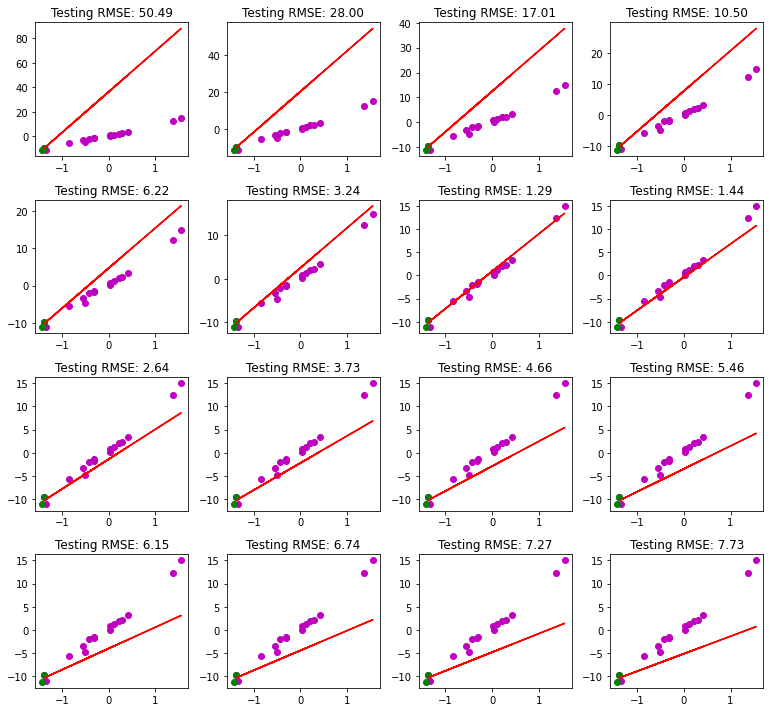

In [71]:
# you can develop similar thing, but not needed, the solution manual will show the code
alpha = np.arange(0, 0.0085, 0.0085/16)
for i in range(16):
    # let us build a regression model on this data study behavior
    
    Lridge = Ridge(alpha=alpha[i]).fit(X_train2.reshape(-1,1), y_train2)
    plt.subplot(4,4,i+1)
    plt.scatter(X_train,y_train, c='m', label='Original training')
    plt.scatter(X_train2,y_train2, c='g', label='limited Training')
    plt.plot(X_train,Lridge.predict(X_train.reshape(-1,1)),  c='r', label='model')
    plt.title('Testing RMSE: %0.2f'% np.sqrt (mean_squared_error(y_test, Lridge.predict(X_test.reshape(-1,1)) ) ))
#     plt.legend()
plt.tight_layout(rect=(0,0,1.8, 2.5))    
plt.show()

**Lasso** can be used similarly to reach the same results. The only different between Lasso and Ridge is the severe effect of lasso on the parameters. It could zero them out.


In [72]:
# You may parctice with lasso and elastic net algorithms


<a name='Question9'></a>

<a name='Question10'></a>

# Additional Exercises


**A:(advertising and return)**

Suppose there is a company that has limited budget for advertisements in this year.
Usually, they use three media to do marketing (TV, Newspapers, and Radio). 
However, due to the limited budget they want to select one media to promote their products this year

**source:** http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv

[Return to Table of Contents](#TableOfContents)

In [73]:
# read data into a DataFrame
adsData = pd.read_csv('Advertising.csv')
adsData.drop(['Unnamed: 0'], axis=1, inplace=True)
adsData.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [74]:
adsData.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
# let us check if there is missing data 
adsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


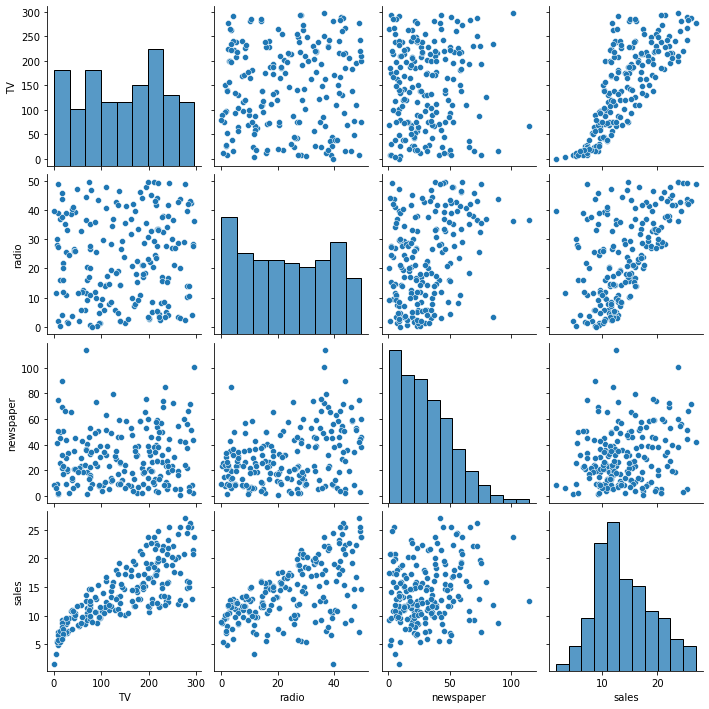

In [76]:
# let us visualize the data
sns.pairplot(adsData,  palette='flare') #rocket_r, magma,viridis,crest,flare
plt.show()

variables **TV and  radio** seem to have a positive correlation with **Sales**

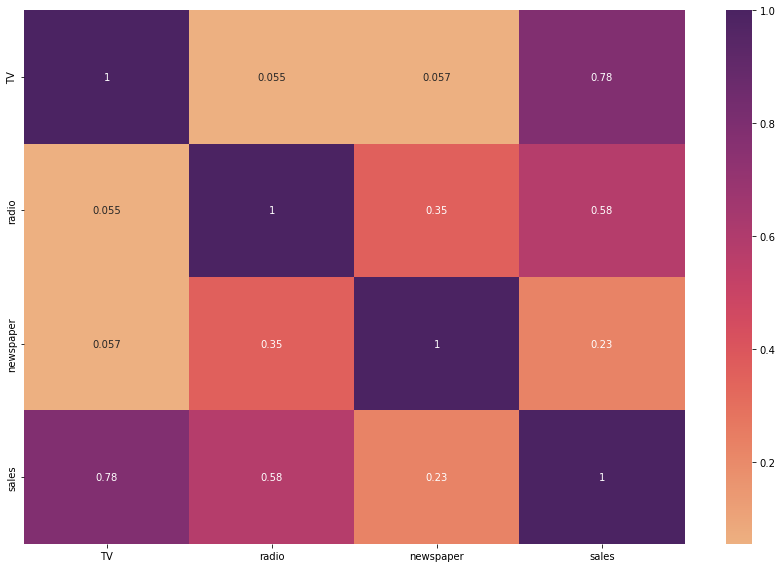

In [77]:
sns.heatmap(adsData.corr(), annot=True,  cmap='flare')
plt.tight_layout(rect=(0,0,2, 2))

If you look at the Sales column, we can see that TV has the highest correlation with Sales!

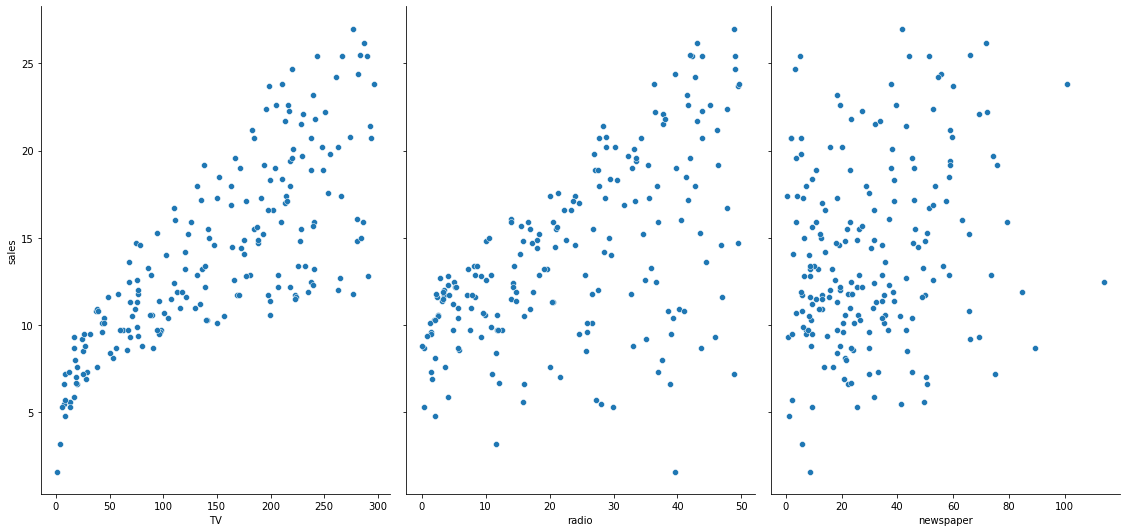

In [78]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(adsData, x_vars=['TV','radio','newspaper'], y_vars='sales', height=5, aspect=0.7)
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.show()

****

### How should we spend our advertising money in the future?
The plots shown above, illustrates the past relationship between ads. spent and sales. Unfortunately, our company has limited budget this time and want to be wisely spend it on the right media. 


#### This general question might lead you to more specific questions:

Is there a relationship between ads and sales?

1. How strong is that relationship?

1. Which ad types contribute to sales?

1. What is the effect of each ad type on sales?

1. Given ad spending in a particular media, can sales be improved?

### Simple Linear Regression

It seems that TV media ads has a linear relationship with sales. Let's try it out!

In [79]:
# let us try TV Media
XTV = adsData['TV'].values
XRd = adsData['radio'].values
XNS = adsData['newspaper'].values
y = adsData['sales'].values

In [80]:
# The Sklearn Linear Regression will not work on 1d array, you need to slice the are to be 2d
lrTV = LinearRegression() 
lrTV.fit(XTV[:, None],y) 

lrRd = LinearRegression() 
lrRd.fit(XRd[:, None],y) 

lrNS = LinearRegression() 
lrNS.fit(XNS[:, None],y) 

print('R-squared (TV Model)', lrTV.score(XTV[:, None],y))
print('R-squared (Radio Model)', lrRd.score(XRd[:, None],y))
print('R-squared (Newspaper Model)', lrNS.score(XNS[:, None],y))


R-squared (TV Model) 0.611875050850071
R-squared (Radio Model) 0.33203245544529525
R-squared (Newspaper Model) 0.05212044544430516


In the above case, we may turst TV model more than others

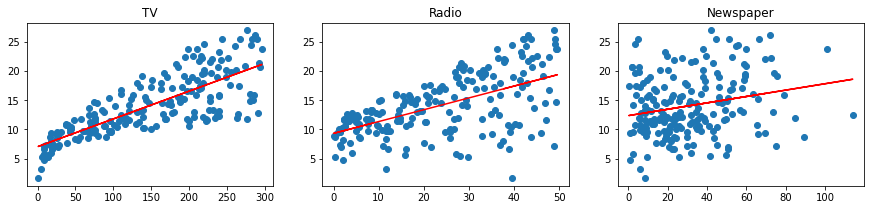

In [81]:
y1_pred= lrTV.predict(XTV[:,None]);
y2_pred= lrRd.predict(XRd[:,None]);
y3_pred= lrNS.predict(XNS[:,None]);

plt.figure(figsize = (15,3) )
plt.subplot(1,3, 1)
plt.scatter(XTV,y)
plt.plot(XTV,y1_pred, c='r')
plt.title('TV')

plt.subplot(1,3, 2)
plt.scatter(XRd,y)
plt.plot(XRd,y2_pred, c='r')
plt.title('Radio')


plt.subplot(1,3, 3)
plt.scatter(XNS,y)
plt.plot(XNS,y3_pred, c='r')
plt.title('Newspaper')


plt.show()

In [82]:
# we got a budget of 50K$ how about using it only on TV media
y1_pred= lrTV.predict([[50]]) # 
y2_pred= lrRd.predict([[50]]) # 
y3_pred= lrNS.predict([[50]]) # 

print('Expected Sales:\nUsing TV\t({0})\nUsing Radio\t({1})\nUsing Newspaper\t({2})'.format(y1_pred[0], y2_pred[0], y3_pred[0]))

Expected Sales:
Using TV	(9.409425570778682)
Using Radio	(19.436427264780267)
Using Newspaper	(15.086061992891828)


**Observation:** even other models than TV have shown higher sales, we may not trust them according to the models R-squared!

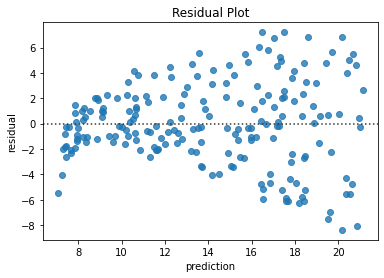

In [83]:
# let us check residual plot (training) of these models
res = y- lrTV.predict(XTV[:,None])
sns.residplot(x= lrTV.predict( XTV[:,None]), y=res )
plt.xlabel('prediction')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.show()

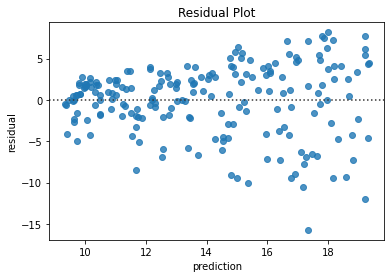

In [84]:
# let us check residual plot (training) of these models
res = y- lrRd.predict(XRd[:,None])
sns.residplot(x= lrRd.predict( XRd[:,None]), y=res )
plt.xlabel('prediction')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.show()

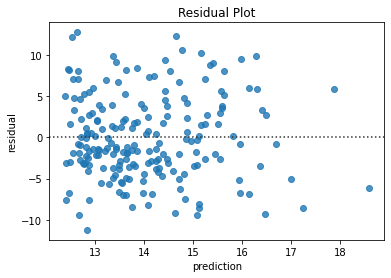

In [85]:
# let us check residual plot (training) of these models
res = y- lrNS.predict(XNS[:,None])
sns.residplot(x= lrNS.predict( XNS[:,None]), y=res )
plt.xlabel('prediction')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.show()

**Observation:** No hetroscedacitty issue

In [86]:
# let us understand TV heteroscedacity issue 
for val in range(5,100,10):
    print('Ads amount: ', val,'$', '\texepected sales: %0.2f'%lrTV.predict([[val]])[0])


Ads amount:  5 $ 	exepected sales: 7.27
Ads amount:  15 $ 	exepected sales: 7.75
Ads amount:  25 $ 	exepected sales: 8.22
Ads amount:  35 $ 	exepected sales: 8.70
Ads amount:  45 $ 	exepected sales: 9.17
Ads amount:  55 $ 	exepected sales: 9.65
Ads amount:  65 $ 	exepected sales: 10.12
Ads amount:  75 $ 	exepected sales: 10.60
Ads amount:  85 $ 	exepected sales: 11.07
Ads amount:  95 $ 	exepected sales: 11.55


Not great, as we increase our budget from 50 to 100, we increased our sales by 2K (Devices for example). That is not encouraging!

**Test Heteroscedacity**
Just to more sure, we can perform White’s Lagrange multiplier test for heteroscedasticity


In [87]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

res = y- lrTV.predict(XTV[:,None])
keys = ['Lagrange statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
xxxx = np.ones(len(XTV))
results = het_white(res, np.append(xxxx.reshape(-1,1) , XTV.reshape(-1,1), axis=1) )  
lzip(keys, results)

[('Lagrange statistic:', 52.62020588770406),
 ("LM test's p-value:", 3.746860060650067e-12),
 ('F-statistic:', 35.168255670038455),
 ("F-test's p-value:", 8.703282032677616e-14)]

As we can see that the p-valueis very small, therefore, we accepts the null hypothesis and confirm that there is potential heteroscedasticity in TV dataset.

In [88]:
res = y- lrNS.predict(XNS[:,None])
keys = ['Lagrange statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
xxxx = np.ones(len(XNS))
results = het_white(res, np.append(xxxx.reshape(-1,1) , XNS.reshape(-1,1), axis=1) )  
lzip(keys, results)

[('Lagrange statistic:', 3.7656012242442083),
 ("LM test's p-value:", 0.15216335791351007),
 ('F-statistic:', 1.8901462888364942),
 ("F-test's p-value:", 0.15377885603683839)]

As we can see that the p-valueis very small, therefore, we reject the null hypothesis and confirm that there is no potential heteroscedasticity in Newspaper dataset.

In [89]:
# There two  pupolar ways to overcome heteroscedacity or at least reduce its effects 
#1. log transform your data, 
#2. use weighted linear regression

# perform log transform
XTV_log = np.log(XTV)

lrTV = LinearRegression() 
lrTV.fit(XTV_log[:, None],y) 

print('R-squared (TV Model)', lrTV.score(XTV_log[:, None],y))

R-squared (TV Model) 0.5650436743196863


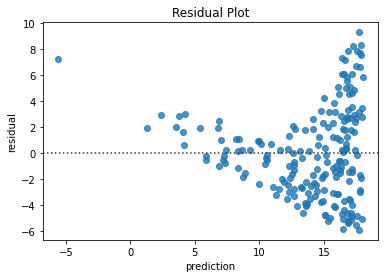

In [90]:
# let us check residual plot (training) of these models
res = y - lrTV.predict(XTV_log[:,None])
sns.residplot(x= lrTV.predict( XTV_log[:,None]), y=res )
plt.xlabel('prediction')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.show()

It seems not working good for us

In [91]:
# weighted
lrTV = LinearRegression() 
lrTV.fit(XTV[:, None],y, sample_weight= 1.0/XTV) 

print('R-squared (TV Model)', lrTV.score(XTV[:, None],y))

R-squared (TV Model) 0.5059772393426222


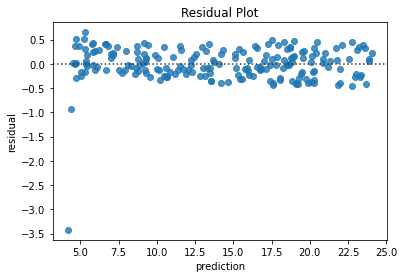

In [92]:
# let us check residual plot (training) of these models
# we need to compute the weighted residual now
res = np.sqrt(1/XTV) * (y- lrTV.predict(XTV[:,None]))
sns.residplot(x= lrTV.predict( XTV[:,None]), y=res )
plt.xlabel('prediction')
plt.ylabel('residual')
plt.title('Residual Plot')
plt.show()

In [93]:
print('Expected sales form investing 50K on TV', lrTV.predict([[50]])[0]) 

Expected sales form investing 50K on TV 7.490303581323122


**observation:**

So instead of 9.5 sales, it seems we'll have only 7.5 sales from this model!!

**Multi linear model**

In [94]:
# using all features at once
data = adsData[['TV', 'radio', 'newspaper']]
# y is as previous
LR = LinearRegression()
LR.fit(data.values, y, sample_weight=1.0/XTV )
y_pred= LR.predict([[50, 0, 0]])

In [95]:
y_pred= LR.predict([[50, 0, 0]])
print('Expected Sales:\nUsing TV\t({0})'.format(y_pred[0]))

Expected Sales:
Using TV	(5.894385419017916)


In [96]:
y_pred= LR.predict([[0, 50, 0]])
print('Expected Sales:\nUsing Radio\t({0})'.format(y_pred[0]))

Expected Sales:
Using Radio	(2.807205873396316)


In [97]:
y_pred= LR.predict([[0, 0, 50]])
print('Expected Sales:\nUsing Newspaper\t({0})'.format(y_pred[0]))

Expected Sales:
Using Newspaper	(5.969885786496981)


The above results make sense to me since TV or Newspapers could the highest to attract people for sales. In modern days, fewer promotions are heard on Radio stations  (personal observation :) )

*************

**B:**  (Car Purchasing dataset)

A car agency wants to data scientist to develop a model that guess the amount a customer is willing to pay for the new car that have successful deals. The data scientist will have access to customer profiles that include annual salary, credit card debt, net-worth besides nationality, gender etc. With such information the data scientist is required to build a model that estimates a value that a customer would agree. 

**Source:** https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model

In [98]:
# load the dataset
carsData = pd.read_csv('Car_Purchasing_Data.csv')

In [99]:
# check out the trianing data
carsData.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [100]:
# check out the testing data
carsData.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [101]:
# let us check categorical variables
print('country:', carsData.Country.unique())
print('Gender:', carsData.Gender.unique())


country: ['USA']
Gender: [0 1]


Only USA is listed in Country column. Therefore, we can remove this column as well as Customer Name and e-mail. 

**Note:** In case of categorical data, we may encode the variable using pd.get_dummies

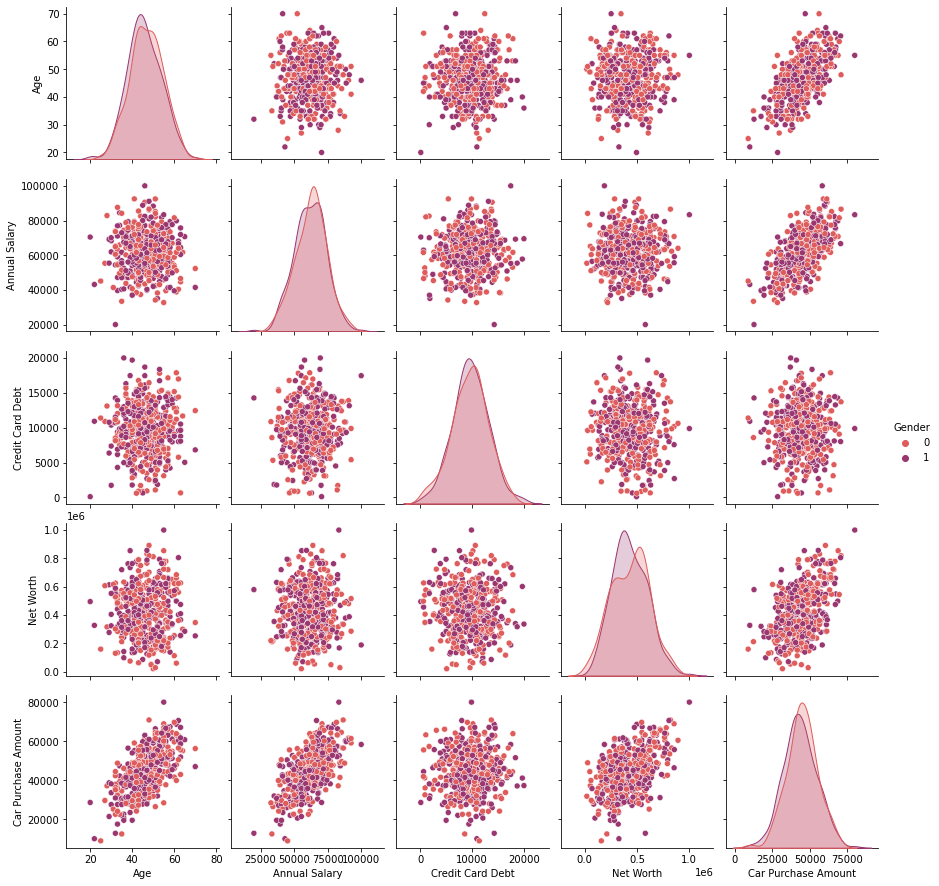

In [102]:
# let us visualize the data
sns.color_palette("magma", as_cmap=True)
sns.pairplot(carsData, hue='Gender', palette='flare') #rocket_r, magma,viridis,crest,flare
plt.show()

variables **Net worth, Age, and Salary** seem to have a positive correlation with **Car Purchase Amount**

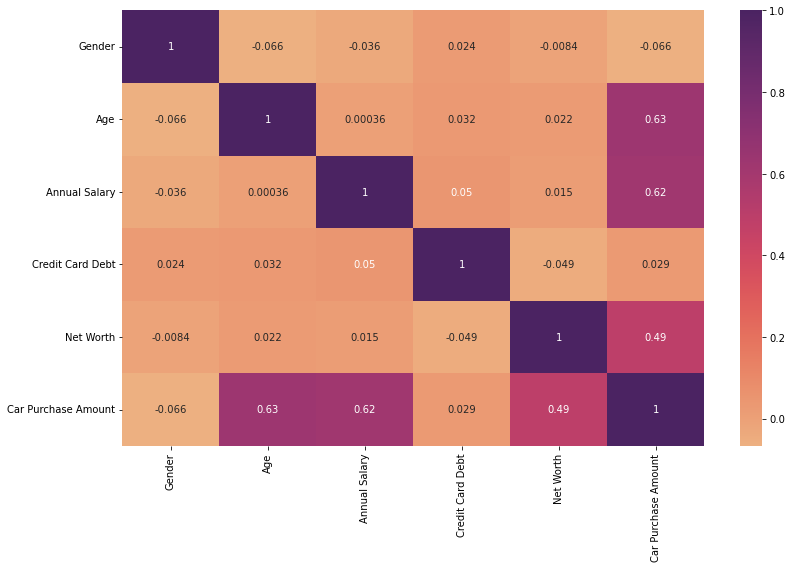

In [103]:
sns.heatmap(carsData.corr(), annot=True,  cmap='flare')
plt.tight_layout(rect=(0,0,2, 2))

**Observation:**

No multicolinear among variables. However, Age, salary, and net worth seem to have higher correlation with **Car Purchase Amount** (target var)

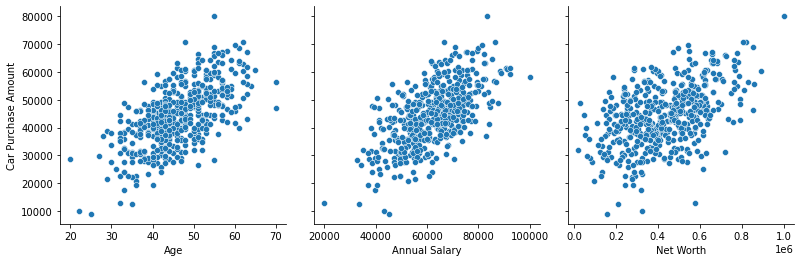

In [104]:
sns.pairplot(carsData, x_vars=["Age","Annual Salary","Net Worth"],y_vars=["Car Purchase Amount"])
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.show()

---

**No futher preprocessing is needed** we can start build a regression model

In [105]:
#removing Name, e-mail, and country information from modeling

# get our independent variables in X 
X_w = carsData[['Gender', 'Age','Annual Salary', 'Credit Card Debt', 'Net Worth']]

# get our target in y 
y_w = carsData['Car Purchase Amount']

*******

In [106]:
# let us load the prepraed training and test datasets
XX_train = pd.read_csv('carsData_train.csv')
XX_test = pd.read_csv('carsData_test.csv')

In [107]:
XX_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                450 non-null    int64  
 1   Gender               450 non-null    int64  
 2   Age                  450 non-null    int64  
 3   Annual Salary        450 non-null    float64
 4   Credit Card Debt     450 non-null    float64
 5   Net Worth            450 non-null    float64
 6   Car Purchase Amount  450 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 24.7 KB


In [108]:
XX_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                50 non-null     int64  
 1   Gender               50 non-null     int64  
 2   Age                  50 non-null     int64  
 3   Annual Salary        50 non-null     float64
 4   Credit Card Debt     50 non-null     float64
 5   Net Worth            50 non-null     float64
 6   Car Purchase Amount  50 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 2.9 KB


In [109]:
# let us drop column Index from the load train and test data files
XX_train.drop(['Index'],axis=1,  inplace=True)
XX_test.drop(['Index'],axis=1, inplace=True)

In [110]:
XX_train

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,27,55369.72784,10888.934940,606851.1696,29670.83337
1,1,41,60101.79725,12989.367840,340720.5185,35823.55471
2,1,41,79444.01301,11620.107900,627086.6563,55174.98946
3,1,45,63845.77186,7761.848528,505048.7599,46012.10616
4,0,51,63869.64928,12860.658240,260269.0963,44418.60955
...,...,...,...,...,...,...
445,1,56,66505.38124,3942.767620,621309.5863,59984.16361
446,1,50,55293.50777,9465.090098,629764.2743,49220.02180
447,1,43,69175.19403,6039.594519,325701.4083,42408.02625
448,1,47,73096.50927,10743.793000,196421.7402,44577.44829


In [111]:
# Create a regression model
lm = LinearRegression()
lm.fit(XX_train.iloc[:,:-1],XX_train.iloc[:,-1])

print('R-squared = ', lm.score(XX_train.iloc[:,:-1],XX_train.iloc[:,-1]))

R-squared =  0.9994978752691055


R-squared almost 1, which means good model, let us check on what this model depends by looking at the coeff..

In [112]:
# let us check the coef
intr      = pd.DataFrame(data = [lm.intercept_], index = ['intercept'], columns=['Coefficient'])
coef_df = pd.DataFrame(lm.coef_,XX_train.columns[:-1],columns=['Coefficient'])
coef_df = pd.concat([intr, coef_df], axis=0)                                                    
coef_df

,Coefficient
intercept,-42085.799089
Gender,14.103920
Age,839.766720
Annual Salary,0.562131
Credit Card Debt,0.007672
Net Worth,0.028911


It is obvious that **Age** coeficients is so strong compared to others

In [113]:
# let us test the model and compute the error 
y_pred = lm.predict(XX_test.iloc[:,:-1])
print('Error RMSE:', np.sqrt( mean_squared_error(XX_test.iloc[:,-1], y_pred) ) )

Error RMSE: 241.91598438237264


Does RMSE value above good or bad?? 

To answer this let's check two other things 
1. power of prediction (check relation between actual vs. predicted)
2. show the residual plot 

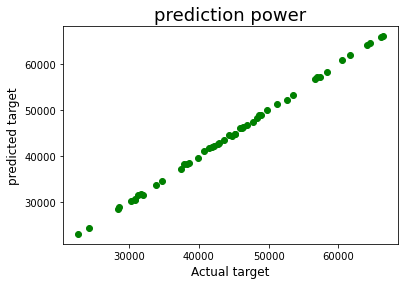

In [114]:
# power of prediction
plt.scatter(XX_test.iloc[:, -1], y_pred, c='g')
plt.xlabel('Actual target', fontsize=12)
plt.ylabel('predicted target', fontsize=12)
plt.title('prediction power', fontsize=18)
plt.show()

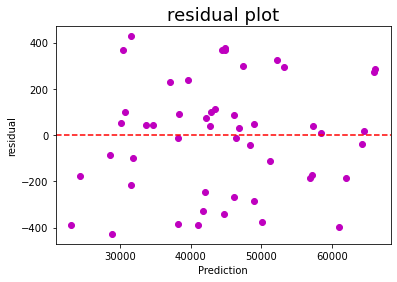

In [115]:
# residual plot 
res = XX_test.iloc[:, -1] - y_pred

plt.axhline(y=0, c='r', linestyle='--')
plt.scatter(y_pred, res, c='m')
plt.xlabel('Prediction')
plt.ylabel('residual')
plt.title('residual plot', fontsize=18)
plt.show()

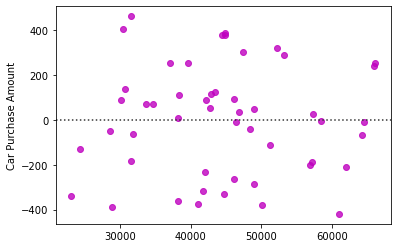

In [116]:
# Seabron has a function residplot
sns.residplot(x=y_pred, y=res, color = 'm')
plt.show()

Residuals are scattered around the ‘0’ line, there is no pattern, and points are not based on one side so there’s no problem of heteroscedasticity.

**Question** can we improve the prediction error further?